#**DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING**

**Objective:**

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

**Dataset:**
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

**Tasks:**

**1. Data Exploration and Preprocessing:**
-	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
-	Handle missing values as per the best practices (imputation, removal, etc.).
-	Apply scaling techniques to numerical features:
-	Standard Scaling
-	Min-Max Scaling
-	Discuss the scenarios where each scaling technique is preferred and why.

**2. Encoding Techniques:**
-	Apply One-Hot Encoding to categorical variables with less than 5 categories.
-	Use Label Encoding for categorical variables with more than 5 categories.
-	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

**3. Feature Engineering:**
-	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
-	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

**4. Feature Selection:**
-	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
-	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest

**Data Exploration and Preprocessing:**

In [2]:
#loading the dataset
df_adult = pd.read_csv('/content/adult_with_headers.csv')
#first few rows
df_adult.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [3]:
#last few rows
df_adult.tail()

age      workclass  fnlwgt    education  education_num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation relationship    race      sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       capital_gain  capital_loss  hours_per_week  native_country  income  
32556             0             0              38   United-States   <=50K  
32557             0             0              40   United-States    >50K  
32558             0             0              40   United-States   <=50K  
32559             0             0              20   United-States   <=50K  
32560         15024             0              40   United-States    >50K

In [4]:
df_adult.shape

(32561, 15)

In [5]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Summary Statstics
df_adult.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

- The **mean age** is around **38.6 years**, with a standard deviation of **13.6 years.**
- Most individuals work around **40 hours per week.**


In [7]:
df_adult.describe(include='object')

workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720

- The **income column**, which is our target variable, has two unique values **(<=50K and >50K)**.

In [8]:
#Datatypes
df_adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
#columns
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
# Typecasting float to int
df_adult['education_num'] = df_adult['education_num'].astype(int)
df_adult['capital_gain'] = df_adult['capital_gain'].astype(int)
df_adult['capital_loss'] = df_adult['capital_loss'].astype(int)
df_adult['hours_per_week'] = df_adult['hours_per_week'].astype(int)


In [11]:
#Typecasting object to category
# Select columns with object dtype
object_columns = df_adult.select_dtypes(include='object').columns

# Convert object columns to category type
df_adult[object_columns] = df_adult[object_columns].astype('category')

In [12]:
# To check Datatypes
df_adult.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object

In [13]:
#uniue values present in categorical data
df_adult.select_dtypes(include='category').nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [14]:
#Handle Missing Values
df_adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

**No missing values present.**

In [15]:
#Identify numerical features
numerical_features = df_adult.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

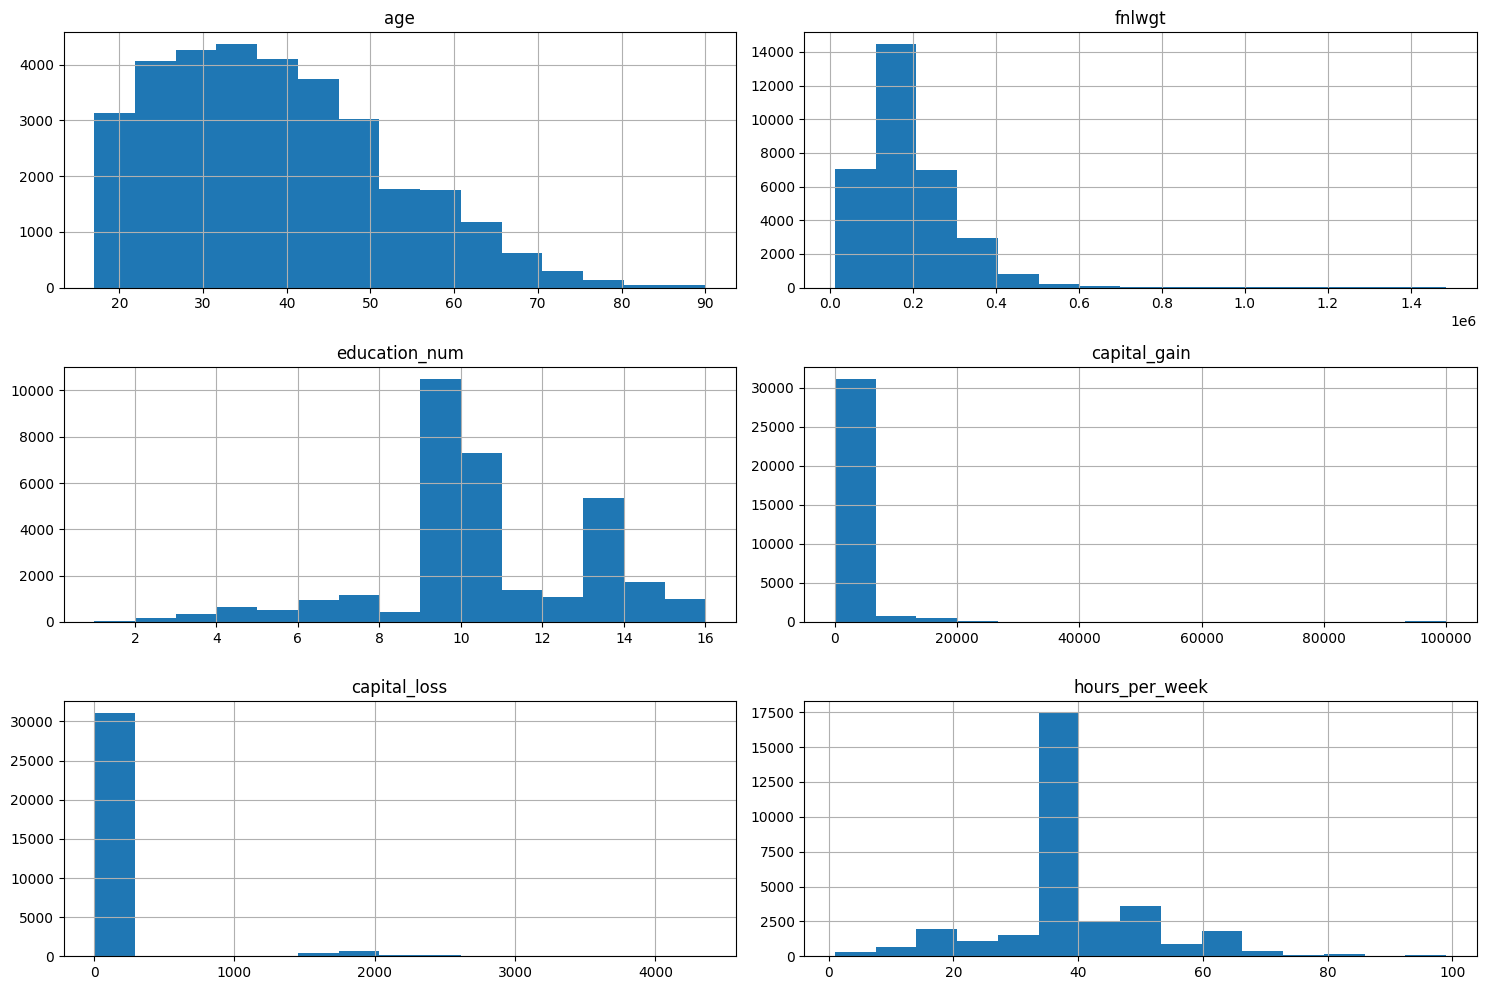

In [16]:
# Histograms
df_adult.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

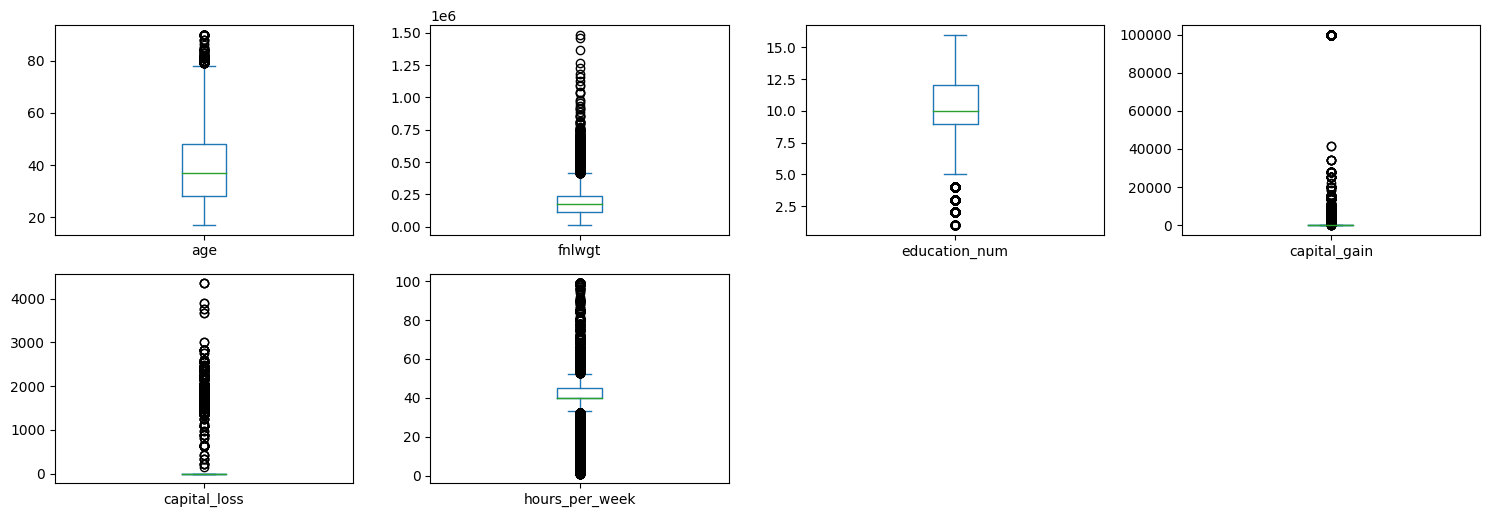

In [17]:
# Box plots
df_adult.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [18]:
#outliers present
outliers = {}

for col in df_adult.select_dtypes(include=['int64', 'float64']).columns: # Select only numerical columns
    Q1 = np.quantile(df_adult[col], 0.25)
    Q3 = np.quantile(df_adult[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_adult[(df_adult[col] < lower_bound) | (df_adult[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")

Outliers in age:
74       79
222      90
430      80
918      81
1040     90
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 143, dtype: int64

Outliers in fnlwgt:
37       544091
40       507875
80       446839
110      432376
157      494223
          ...  
32306    427686
32329    435842
32470    485710
32496    436163
32511    514716
Name: fnlwgt, Length: 992, dtype: int64

Outliers in education_num:
15       4
56       3
61       4
79       4
160      2
        ..
32431    4
32432    1
32448    4
32479    4
32517    4
Name: education_num, Length: 1198, dtype: int64

Outliers in capital_gain:
0         2174
8        14084
9         5178
59        5013
60        2407
         ...  
32515     3471
32518    99999
32538    15020
32548     1086
32560    15024
Name: capital_gain, Length: 2712, dtype: int64

Outliers in capital_loss:
23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
32441    1887
32443    1602
32

In [19]:
#scaling the numerical features
# Apply Standard Scaling
standard_scaler = StandardScaler()
standard_scaled_data = df_adult.copy()
standard_scaled_data[numerical_features] = standard_scaler.fit_transform(df_adult[numerical_features])

In [20]:
# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled_data = df_adult.copy()
min_max_scaled_data[numerical_features] = min_max_scaler.fit_transform(df_adult[numerical_features])

In [21]:
# Display the first few rows of the scaled datasets
print("Standard Scaled Data:")
print(standard_scaled_data.head())

Standard Scaled Data:
        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0   

In [22]:
print("\nMin-Max Scaled Data:")
print(min_max_scaled_data.head())


Min-Max Scaled Data:
        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0   

**Scenarios where each scaling technique is preferred and why?**

#####**Scaling Techniques**
- **Standard Scaling:** Scales the data to have a mean of 0 and a standard deviation of 1. It is preferred when the data follows a normal distribution.

- **Min-Max Scaling:** Scales the data to a fixed range, usually 0 to 1. It is preferred when the data does not necessarily follow a normal distribution or when we want to preserve the relationships of the data.

###**Standard Scaling**
**Definition: Standard Scaling (or Z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1.**
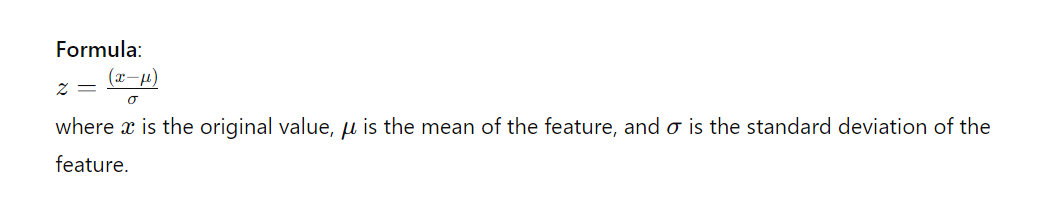

###**Preferred Scenarios:**
- **Normally Distributed Data:** When the data follows a normal distribution, Standard Scaling is preferred because it standardizes the data around the mean, making it suitable for models that assume normality.
- **Algorithms Assuming Normality:** Algorithms like Linear Regression, Logistic Regression, and Linear Discriminant Analysis assume that the data is normally distributed. Standard Scaling helps these models perform better by standardizing the feature distributions.
- **Principal Component Analysis (PCA):** PCA projects data onto a lower-dimensional subspace. Standard Scaling is preferred because PCA is influenced by the variance of the data. Standardized data ensures that each feature contributes equally to the principal components.

Why? **Standard Scaling** transforms the features to be centered around 0 with a standard deviation of 1. This is important for algorithms that assume normality or rely on the variance of the features to make predictions.

###**Min-Max Scaling**
**Definition: Min-Max Scaling (or normalization) transforms the data to fit within a specific range, typically [0, 1].**

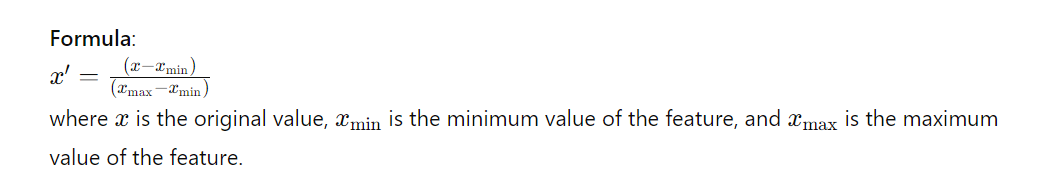

**Preferred Scenarios:**
- **Data Not Following Normal Distribution:** When the data does not follow a normal distribution, Min-Max Scaling ensures that all features are transformed to the same scale without distorting the differences in the ranges of values.
- **Distance-Based Algorithms:** Algorithms like k-Nearest Neighbors (k-NN), Support Vector Machines (SVM), and Neural Networks that rely on distances or gradients are sensitive to the scale of the data. Min-Max Scaling ensures that all features contribute equally to the distance calculations.
- **Preserving Relationships:** Min-Max Scaling preserves the relationships and the relative distance between the original data points. This is useful when the original distribution of the data needs to be maintained.

Why? **Min-Max Scaling** ensures that all features are within the same range, which is crucial for distance-based algorithms and models that use gradients. This helps prevent features with larger ranges from dominating the learning process.

**Encoding Techniques:**

In [23]:
# Identify categorical variables with less than and more than 5 categories
cat_less_than_5 = ['sex', 'income']
cat_more_than_5 = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']

In [24]:
# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(df_adult[cat_less_than_5]), columns=one_hot_encoder.get_feature_names_out(cat_less_than_5))

In [25]:
print(encoded_one_hot.head())

   sex_ Male  income_ >50K
0        1.0           0.0
1        1.0           0.0
2        1.0           0.0
3        1.0           0.0
4        0.0           0.0


In [26]:
# Apply Label Encoding
label_encoder = LabelEncoder()
encoded_label = df_adult[cat_more_than_5].apply(label_encoder.fit_transform)

In [27]:
print(encoded_label.head())

   workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  
0              39  
1              39  
2              39  
3              39  
4               5  


In [28]:
# Combine the encoded features with the numerical features
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
encoded_data = pd.concat([df_adult[numerical_features], encoded_label, encoded_one_hot], axis=1)

# Display the first few rows of the encoded dataset
print(encoded_data.head())

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  sex_ Male  income_ >50K  
0              39        1.0           0.

###**One-Hot Encoding**
Definition: One-Hot Encoding converts categorical variables into a series of binary columns, each representing a unique category. Each column contains a 1 or 0 to indicate the presence or absence of the category.

####**Pros:**
- **Non-Ordinal Categories:** One-Hot Encoding is ideal for categorical variables where the categories do not have a natural ordinal relationship (e.g., color: red, green, blue).
- **Model Compatibility:** Many machine learning algorithms perform better with One-Hot Encoded data because it does not assume any ordinal relationship between categories (e.g., tree-based algorithms, linear models).
- **Interpretability:** The encoded columns are easy to interpret, as each column represents a specific category.
- **Avoids Ordinality:** Prevents the model from assuming any natural ordering among the categories, which is useful when such an assumption is incorrect.

####**Cons:**
- **High Dimensionality:** One-Hot Encoding can lead to a significant increase in the dimensionality of the dataset, especially if the categorical variable has many unique categories. This can lead to the "curse of dimensionality" and increased computational cost.
- **Sparse Data:** The resulting matrix is often sparse (many zeros), which can be inefficient in terms of storage and computation.
- **Overfitting:** High dimensionality can lead to overfitting, especially in models that are sensitive to the number of features.

###**Label Encoding**
Definition: Label Encoding converts categorical variables into integer codes, where each unique category is assigned a different integer.

####**Pros:**
- **Simplicity:** Label Encoding is simple and fast to implement, as it replaces categories with integer codes.
- **Low Dimensionality:** Unlike One-Hot Encoding, Label Encoding does not increase the dimensionality of the dataset, which can be beneficial for computational efficiency and memory usage.
- **Order Sensitivity:** Can be beneficial if there is a natural ordinal relationship among categories (e.g., low, medium, high).

####**Cons:**
- **Implied Ordinality:** Label Encoding imposes an ordinal relationship on the categories, which can be misleading and inappropriate for non-ordinal data. This can negatively impact model performance for algorithms that assume the ordering of categories.
- **Model Bias:** Some algorithms may interpret the encoded values as having an inherent order, leading to biased results. For example, a category encoded as 2 might be treated as more important than a category encoded as 1, even if no such relationship exists.
- **Less Interpretability:** The integer codes are less interpretable compared to One-Hot Encoded columns.

####**Choosing Between One-Hot Encoding and Label Encoding**

**When to Use One-Hot Encoding:**
- When the categorical variable is non-ordinal.
- When the number of unique categories is relatively small to avoid high dimensionality.
- When using algorithms that do not assume any ordinal relationship among categories (e.g., tree-based algorithms, neural networks).

**When to Use Label Encoding:**

- When the categorical variable has a natural ordinal relationship.
- When you need to maintain a low dimensionality.
- When using algorithms that can handle ordinal relationships appropriately (e.g., certain linear models).

**Feature Engineering:**

In [29]:
# Create interaction term between education_num and hours_per_week
encoded_data['education_hours'] = encoded_data['education_num'] * encoded_data['hours_per_week']

In [30]:
# Create age groups
encoded_data['age_group'] = pd.cut(encoded_data['age'], bins=[0, 25, 45, 65, 100], labels=['young', 'adult', 'mid_age', 'senior'])
encoded_data['age_group'] = label_encoder.fit_transform(encoded_data['age_group'])

In [31]:
#create net capital gain/loss for an individual
encoded_data['capital_diff'] = encoded_data['capital_gain'] - encoded_data['capital_loss']

In [32]:
#create total number of hours worked per year
encoded_data['work_hours_per_year'] = encoded_data['hours_per_week'] * 52

In [33]:
# Display the first few rows with the new features
print(encoded_data.head())

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  sex_ Male  income_ >50K  education_hours  age_group  \
0           

**New Features created**
1. **Interaction Term:**
- Rationale: Create an interaction term between education_num and hours_per_week.
2. **Age Group:**
- Rationale: Create age groups based on age.
3. **capital_diff:**
- Rationale: This feature is the difference between capital_gain and capital_loss. It captures the net capital gain/loss for an individual, which can provide a clearer picture of the financial status of an individual than considering capital_gain and capital_loss separately.
4. **work_hours_per_year:**
- Rationale: This feature calculates the total number of hours worked per year by multiplying hours_per_week by 52 (weeks in a year). It gives an estimate of the overall work effort, which can correlate with income levels.

In [34]:
# Apply log transformation to capital_gain
encoded_data['log_capital_gain'] = np.log1p(encoded_data['capital_gain'])  # log1p is used to handle zero values

###**Applying a Transformation**

**Log Transformation on capital_gain**

**Rationale:**
- The **capital_gain** feature is often highly skewed, as most people have zero or low capital gains, while a few have very high capital gains.
- Applying a log transformation can reduce skewness and help in stabilizing the variance, making it easier for the model to learn from this feature.

**Feature Selection**

- **Using the Isolation Forest Algorithm to Identify and Remove Outliers**

The **Isolation Forest algorithm** is an effective method for identifying outliers in a dataset. It works by isolating observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [35]:
# Initialize Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)  # Assuming 5% of the data are outliers
encoded_data['anomaly'] = isolation_forest.fit_predict(encoded_data)

In [36]:
# Remove outliers
encoded_data_cleaned = encoded_data[encoded_data['anomaly'] == 1].drop(columns=['anomaly'])

In [37]:
# Display the cleaned data
print("Data after removing outliers:")
print(encoded_data_cleaned.head())

Data after removing outliers:
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  sex_ Male  income_ >50K  education_ho

####**How Outliers Can Affect Model Performance:**
- **Model Accuracy:** Outliers can skew the results of the model, leading to inaccurate predictions. This is especially true for models that are sensitive to the range and distribution of the data, like linear regression.
- **Training Time:** Outliers can increase the training time of the model, as the model might spend more time trying to fit these anomalies.
- **Model Interpretation:** Outliers can affect the interpretability of the model coefficients and the relationships between features.
- **Algorithm Performance:** Certain algorithms, like k-NN and SVM, can be heavily impacted by outliers since these models rely on distances.

- **Applying Predictive Power Score (PPS)**

**PPS**  is a method to find relationships between features that works regardless of the type of the feature (categorical or numerical) and their distribution. PPS is asymmetric, meaning the score for feature X predicting feature Y might be different from Y predicting X.

In [38]:
#install pandas-pps package
!pip install ppscore

In [39]:
import ppscore as pps

In [40]:
# Calculate the PPS matrix
pps_matrix = pps.matrix(encoded_data_cleaned)

In [41]:
# Extracting the PPS scores for the relationships between features
pps_scores = pps_matrix[['x', 'y', 'ppscore']].pivot(index='x', columns='y', values='ppscore')

In [42]:
#print matrix
print("PPS Matrix:")
print(pps_scores)

PPS Matrix:
y                         age  age_group  capital_diff  capital_gain  \
x                                                                      
age                  1.000000   1.000000      0.000000      0.000000   
age_group            0.608254   1.000000      0.000000      0.000000   
capital_diff         0.001141   0.000000      1.000000      0.998470   
capital_gain         0.000000   0.000000      0.685108      1.000000   
capital_loss         0.000530   0.000000      0.000000      0.000000   
education            0.018271   0.000000      0.000000      0.000000   
education_hours      0.010713   0.014347      0.000000      0.000000   
education_num        0.018271   0.000000      0.000000      0.000000   
fnlwgt               0.000000   0.000000      0.000000      0.000000   
hours_per_week       0.011694   0.026631      0.000000      0.000000   
income_ >50K         0.042454   0.000000      0.000000      0.000000   
log_capital_gain     0.000000   0.000000      0.6849

**Comparing PPS with Correlation Matrix**

In [43]:
# Calculate the correlation matrix
correlation_matrix = encoded_data_cleaned.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                          age    fnlwgt  education_num  capital_gain  \
age                  1.000000 -0.077541       0.041223      0.085001   
fnlwgt              -0.077541  1.000000      -0.044723     -0.019597   
education_num        0.041223 -0.044723       1.000000      0.115492   
capital_gain         0.085001 -0.019597       0.115492      1.000000   
capital_loss         0.051993 -0.012294       0.078360     -0.041870   
hours_per_week       0.103060 -0.022044       0.135090      0.069731   
workclass            0.029143 -0.016240       0.037232      0.031951   
education           -0.002334 -0.028157       0.344316      0.010115   
marital_status      -0.295049  0.028769      -0.056173     -0.055319   
occupation          -0.007111 -0.000067       0.100541      0.030102   
relationship        -0.282853  0.008326      -0.097254     -0.126409   
race                 0.032626 -0.028281       0.031013      0.051102   
native_country       0.016884 -0.052940     

####**Discussion:**

**Correlation Matrix:**
- Shows linear relationships between numerical features.
- Symmetric: Correlation between X and Y is the same as Y and X.
- Does not handle categorical features directly without encoding.
- Does not capture non-linear relationships.

**PPS Matrix:**
- Can handle both categorical and numerical features.
- Asymmetric: PPS between X and Y can differ from Y and X, reflecting different predictive strengths.
- Captures both linear and non-linear relationships.

**Interpretation:**
- Strong PPS but Low Correlation: Indicates a non-linear relationship or a strong predictive relationship in one direction.
- High Correlation and High PPS: Confirms a strong linear relationship and strong predictive power.
- Low PPS and Low Correlation: Indicates no significant relationship between the features.